In [1]:

import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import platform # 맥인지 윈도우즈인지

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False  # 영어 외에 언어도 지원하게함

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [3]:
pdt=pd.read_csv('data/서울시 상권분석서비스(길단위인구-행정동).csv', encoding='cp949')
pdt.head()
pdt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8075 entries, 0 to 8074
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   기준_년분기_코드         8075 non-null   int64 
 1   행정동_코드            8075 non-null   int64 
 2   행정동_코드_명          8075 non-null   object
 3   총_유동인구_수          8075 non-null   int64 
 4   남성_유동인구_수         8075 non-null   int64 
 5   여성_유동인구_수         8075 non-null   int64 
 6   연령대_10_유동인구_수     8075 non-null   int64 
 7   연령대_20_유동인구_수     8075 non-null   int64 
 8   연령대_30_유동인구_수     8075 non-null   int64 
 9   연령대_40_유동인구_수     8075 non-null   int64 
 10  연령대_50_유동인구_수     8075 non-null   int64 
 11  연령대_60_이상_유동인구_수  8075 non-null   int64 
 12  시간대_00_06_유동인구_수  8075 non-null   int64 
 13  시간대_06_11_유동인구_수  8075 non-null   int64 
 14  시간대_11_14_유동인구_수  8075 non-null   int64 
 15  시간대_14_17_유동인구_수  8075 non-null   int64 
 16  시간대_17_21_유동인구_수  8075 non-null   int64 
 17  시간대_21_24_유동인구

In [4]:
pdt = pdt[pdt['기준_년분기_코드'].astype(str).str.startswith('2022')]
pdt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1700 entries, 5100 to 6799
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   기준_년분기_코드         1700 non-null   int64 
 1   행정동_코드            1700 non-null   int64 
 2   행정동_코드_명          1700 non-null   object
 3   총_유동인구_수          1700 non-null   int64 
 4   남성_유동인구_수         1700 non-null   int64 
 5   여성_유동인구_수         1700 non-null   int64 
 6   연령대_10_유동인구_수     1700 non-null   int64 
 7   연령대_20_유동인구_수     1700 non-null   int64 
 8   연령대_30_유동인구_수     1700 non-null   int64 
 9   연령대_40_유동인구_수     1700 non-null   int64 
 10  연령대_50_유동인구_수     1700 non-null   int64 
 11  연령대_60_이상_유동인구_수  1700 non-null   int64 
 12  시간대_00_06_유동인구_수  1700 non-null   int64 
 13  시간대_06_11_유동인구_수  1700 non-null   int64 
 14  시간대_11_14_유동인구_수  1700 non-null   int64 
 15  시간대_14_17_유동인구_수  1700 non-null   int64 
 16  시간대_17_21_유동인구_수  1700 non-null   int64 
 17  시간대_21_24_유동인구_수

In [5]:
pdt.head()

,기준_년분기_코드,행정동_코드,행정동_코드_명,총_유동인구_수,남성_유동인구_수,여성_유동인구_수,연령대_10_유동인구_수,연령대_20_유동인구_수,연령대_30_유동인구_수,연령대_40_유동인구_수,...,시간대_14_17_유동인구_수,시간대_17_21_유동인구_수,시간대_21_24_유동인구_수,월요일_유동인구_수,화요일_유동인구_수,수요일_유동인구_수,목요일_유동인구_수,금요일_유동인구_수,토요일_유동인구_수,일요일_유동인구_수
5100,20221,11290630,정릉2동,5962774,2693563,3269212,1053913,798684,848364,934571,...,611794,943531,843531,841018,849356,851914,839813,834187,865887,880602
5101,20221,11290640,정릉3동,2989513,1481361,1508152,437579,721873,352236,366503,...,348726,495407,395019,420925,420341,419473,419863,416037,441223,451654
5102,20221,11290650,정릉4동,3387907,1575940,1811969,557099,481534,459409,527655,...,354815,514894,460843,475895,479972,480107,474820,471912,495465,509737
5103,20221,11290660,길음1동,6543237,2911310,3631928,1891903,587817,760827,1254594,...,736749,1078392,873138,920287,922755,933831,930116,925360,954484,956403
5104,20221,11290685,길음2동,4618415,2080583,2537832,850286,519314,645548,804025,...,579609,814344,594614,641503,641129,647448,645394,650127,699465,693350


In [6]:
# 행정동 코드명을 행으로 놔두고 4분기를 합쳐서  평균내려고 한다.
pdt.set_index('행정동_코드_명',inplace=True)

In [7]:
pdt = pdt.loc[:].groupby('행정동_코드_명').mean().astype(int)

In [8]:
pdt

,기준_년분기_코드,행정동_코드,총_유동인구_수,남성_유동인구_수,여성_유동인구_수,연령대_10_유동인구_수,연령대_20_유동인구_수,연령대_30_유동인구_수,연령대_40_유동인구_수,연령대_50_유동인구_수,...,시간대_14_17_유동인구_수,시간대_17_21_유동인구_수,시간대_21_24_유동인구_수,월요일_유동인구_수,화요일_유동인구_수,수요일_유동인구_수,목요일_유동인구_수,금요일_유동인구_수,토요일_유동인구_수,일요일_유동인구_수
행정동_코드_명,,,,,,,,,,,,,,,,,,,,,
가락1동,20222,11710631,738720,360448,378271,114587,75227,137737,130926,117317,...,90106,124322,94101,106196,105766,106208,105983,106503,105777,102285
가락2동,20222,11710632,6232246,2880412,3351833,1152994,725510,950944,1014216,949795,...,708814,1027478,829284,894828,889075,891138,884094,888934,888246,895929
가락본동,20222,11710620,8279250,4063656,4215594,1168537,1126683,1529840,1439137,1365063,...,1005536,1323112,1038863,1206929,1216211,1215994,1218593,1212901,1116313,1092307
가리봉동,20222,11530595,3201184,1804243,1396940,119181,593378,726467,581820,587755,...,401518,526725,389503,465604,469216,467009,465809,456652,424552,452338
가산동,20222,11545510,4944760,2762858,2181901,220883,1162996,1291924,892422,706504,...,716359,789912,535568,754121,770402,764061,766975,745545,569429,574225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
효창동,20222,11170580,3915304,1719537,2195766,603194,565093,705112,624845,554220,...,453138,657272,528501,563405,561973,560054,558075,554325,554743,562728
후암동,20222,11170510,4371896,2089275,2282620,597540,588276,811199,740232,632757,...,464322,641682,568612,629338,627000,627826,625292,620108,610946,631383
휘경1동,20222,11230720,5703058,2532848,3170209,673630,1795058,779402,682167,687150,...,633601,931380,744249,809256,807615,807804,804863,803741,831562,838214


<Axes: xlabel='행정동_코드_명'>

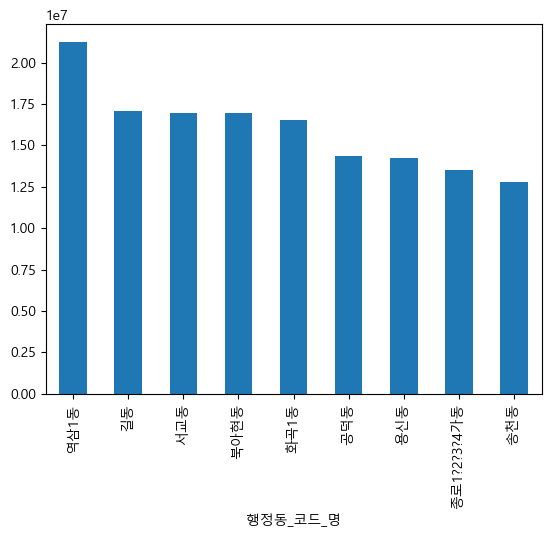

In [9]:
# 유동인구 top10
# 유동인구 fp(floating population)
fp_10 = pdt['총_유동인구_수'].sort_values(ascending = False)[0:9]
fp_10.plot.bar()

In [10]:
# 2030 유동인구 탑10
# 2030 유동인구 열을 새로 만들어줌
pdt['2030 유동인구'] = pdt['연령대_20_유동인구_수']+pdt['연령대_30_유동인구_수']
pdt.head()

,기준_년분기_코드,행정동_코드,총_유동인구_수,남성_유동인구_수,여성_유동인구_수,연령대_10_유동인구_수,연령대_20_유동인구_수,연령대_30_유동인구_수,연령대_40_유동인구_수,연령대_50_유동인구_수,...,시간대_17_21_유동인구_수,시간대_21_24_유동인구_수,월요일_유동인구_수,화요일_유동인구_수,수요일_유동인구_수,목요일_유동인구_수,금요일_유동인구_수,토요일_유동인구_수,일요일_유동인구_수,2030 유동인구
행정동_코드_명,,,,,,,,,,,,,,,,,,,,,
가락1동,20222,11710631,738720,360448,378271,114587,75227,137737,130926,117317,...,124322,94101,106196,105766,106208,105983,106503,105777,102285,212964
가락2동,20222,11710632,6232246,2880412,3351833,1152994,725510,950944,1014216,949795,...,1027478,829284,894828,889075,891138,884094,888934,888246,895929,1676454
가락본동,20222,11710620,8279250,4063656,4215594,1168537,1126683,1529840,1439137,1365063,...,1323112,1038863,1206929,1216211,1215994,1218593,1212901,1116313,1092307,2656523
가리봉동,20222,11530595,3201184,1804243,1396940,119181,593378,726467,581820,587755,...,526725,389503,465604,469216,467009,465809,456652,424552,452338,1319845
가산동,20222,11545510,4944760,2762858,2181901,220883,1162996,1291924,892422,706504,...,789912,535568,754121,770402,764061,766975,745545,569429,574225,2454920


In [11]:
# 2030 유동인구 탑10
# 유동인구 fp(floating population) 2030 top 5
fp_2030_10 = pdt['2030 유동인구'].sort_values(ascending = False)[0:10]
fp_2030_10

행정동_코드_명
역삼1동           11043904
서교동             9348797
신촌동             6550301
신림동             6163341
화곡1동            6139435
북아현동            6102533
화양동             5805820
종로1?2?3?4가동     5291129
청룡동             5258591
논현1동            5158666
Name: 2030 유동인구, dtype: int32

In [12]:
# 금토일 유동인구 탑10
# 금토일 유동인구 열을 새로 만들어줌
pdt['금,토,일 유동인구'] = pdt['금요일_유동인구_수']+pdt['토요일_유동인구_수']+pdt['일요일_유동인구_수']
pdt.head()

,기준_년분기_코드,행정동_코드,총_유동인구_수,남성_유동인구_수,여성_유동인구_수,연령대_10_유동인구_수,연령대_20_유동인구_수,연령대_30_유동인구_수,연령대_40_유동인구_수,연령대_50_유동인구_수,...,시간대_21_24_유동인구_수,월요일_유동인구_수,화요일_유동인구_수,수요일_유동인구_수,목요일_유동인구_수,금요일_유동인구_수,토요일_유동인구_수,일요일_유동인구_수,2030 유동인구,"금,토,일 유동인구"
행정동_코드_명,,,,,,,,,,,,,,,,,,,,,
가락1동,20222,11710631,738720,360448,378271,114587,75227,137737,130926,117317,...,94101,106196,105766,106208,105983,106503,105777,102285,212964,314565
가락2동,20222,11710632,6232246,2880412,3351833,1152994,725510,950944,1014216,949795,...,829284,894828,889075,891138,884094,888934,888246,895929,1676454,2673109
가락본동,20222,11710620,8279250,4063656,4215594,1168537,1126683,1529840,1439137,1365063,...,1038863,1206929,1216211,1215994,1218593,1212901,1116313,1092307,2656523,3421521
가리봉동,20222,11530595,3201184,1804243,1396940,119181,593378,726467,581820,587755,...,389503,465604,469216,467009,465809,456652,424552,452338,1319845,1333542
가산동,20222,11545510,4944760,2762858,2181901,220883,1162996,1291924,892422,706504,...,535568,754121,770402,764061,766975,745545,569429,574225,2454920,1889199


<Axes: xlabel='행정동_코드_명', ylabel='인원\n단위:만명?'>

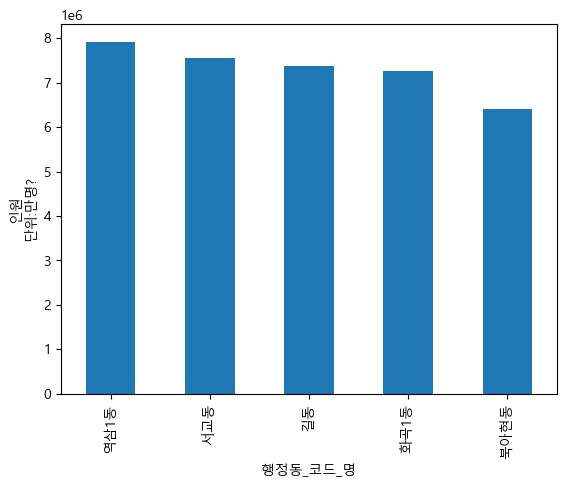

In [13]:
# 금토일 유동인구 탑5
# weekend top 5
we_5= pdt['금,토,일 유동인구'].sort_values(ascending= False)[0:5]
we_5.plot.bar(ylabel='인원\n단위:만명?')

---------------------------

★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★

----------

In [14]:
est = pd.read_csv('data/서울시_상권분석서비스(추정매출-행정동)_2022년.csv', encoding='cp949')
est.head()
est[est['당월_매출_금액']>0]

,기준_년분기_코드,행정동_코드,행정동_코드_명,서비스_업종_코드,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,주중_매출_금액,주말_매출_금액,월요일_매출_금액,...,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수
0,20221,11470620,신정1동,CS200007,치과의원,1255371056,8697,1073122439,182248617,183571522,...,1283,0,3962,4671,8,597,1089,2116,2230,2593
1,20221,11410555,북아현동,CS300011,일반의류,536751541,3445,400057216,136694325,102919117,...,903,0,458,2950,0,0,68,153,1202,1985
2,20221,11410585,신촌동,CS200028,미용실,2930026124,45797,1789589657,1140436467,310057864,...,16506,633,19421,26359,420,17471,10884,6655,7402,2947
3,20221,11410585,신촌동,CS300004,핸드폰,30747090,916,30747090,0,27857849,...,554,0,397,519,0,276,121,121,242,156
4,20221,11410615,연희동,CS100002,중식음식점,1941612453,37494,1150902124,790710329,186534866,...,15079,747,20216,12738,49,5530,8002,6575,7164,5639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67743,20224,11620695,신림동,CS200006,일반의원,9299370423,225884,7917160818,1382209605,1806324862,...,50916,144,92982,132711,1153,65327,55848,28949,33463,40953
67744,20224,11620695,신림동,CS300019,의료기기,1870653857,2710,1870653857,0,12842033,...,299,0,1096,1614,0,0,101,299,1194,1116
67745,20224,11620685,신사동,CS200032,가전제품수리,131873111,308,118784581,13088530,0,...,0,0,123,185,0,0,61,0,247,0
67746,20224,11620685,신사동,CS100009,호프-간이주점,525372348,12829,330833170,194539178,52542745,...,2467,5158,8897,3767,151,4788,3282,1975,1808,660


In [15]:
est.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67748 entries, 0 to 67747
Data columns (total 53 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   기준_년분기_코드        67748 non-null  int64 
 1   행정동_코드           67748 non-null  int64 
 2   행정동_코드_명         67748 non-null  object
 3   서비스_업종_코드        67748 non-null  object
 4   서비스_업종_코드_명      67748 non-null  object
 5   당월_매출_금액         67748 non-null  int64 
 6   당월_매출_건수         67748 non-null  int64 
 7   주중_매출_금액         67748 non-null  int64 
 8   주말_매출_금액         67748 non-null  int64 
 9   월요일_매출_금액        67748 non-null  int64 
 10  화요일_매출_금액        67748 non-null  int64 
 11  수요일_매출_금액        67748 non-null  int64 
 12  목요일_매출_금액        67748 non-null  int64 
 13  금요일_매출_금액        67748 non-null  int64 
 14  토요일_매출_금액        67748 non-null  int64 
 15  일요일_매출_금액        67748 non-null  int64 
 16  시간대_00~06_매출_금액  67748 non-null  int64 
 17  시간대_06~11_매출_금액  67748 non-null

In [16]:
# est.value_counts()

In [17]:

est[est['당월_매출_금액']<0]

,기준_년분기_코드,행정동_코드,행정동_코드_명,서비스_업종_코드,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,주중_매출_금액,주말_매출_금액,월요일_매출_금액,...,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수


In [18]:
# # 행정동 코드명을 행으로 놔두고 4분기를 합쳐서  평균내려고 한다.
# est.set_index('행정동_코드_명',inplace=True)
# est = est.loc[:].groupby('행정동_코드_명').mean().astype(int)

In [19]:
est.sort_index()
est[est['당월_매출_금액']<0]

,기준_년분기_코드,행정동_코드,행정동_코드_명,서비스_업종_코드,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,주중_매출_금액,주말_매출_금액,월요일_매출_금액,...,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수


In [20]:
# 서울시 젤 많은 업종 탑 10
est['서비스_업종_코드_명'].value_counts()

서비스_업종_코드_명
한식음식점           1692
미용실             1676
슈퍼마켓            1672
편의점             1667
커피-음료           1665
                ... 
자전거 및 기타운송장비     340
가방               258
완구                99
부동산중개업            96
고시원               59
Name: count, Length: 63, dtype: int64

In [21]:
### 추정 매출 ###
# 그냥 많은 업종 탑10
# 매출 건수(주말+주중) 동네,업종
# 당월 매출 금액 동네,업종
# 2030 동네,업종
# 동네별로 묶은 테이블과 업종 별로 묶은 테이블 만들어야하나??

In [22]:
# # 행정동 코드명을 행
# # 행정동을 행으로한 테이블
# est_city =est.set_index('행정동_코드_명')
# est_city.sort_index()

In [23]:
# 동네를 그냥 분기 신경안쓰고 합치려다보니 문자열이 있는 서비스 업종 코드명을 버려야한다.
est_city = est.drop(columns=['서비스_업종_코드_명','서비스_업종_코드'])


In [24]:
est_city.head()

,기준_년분기_코드,행정동_코드,행정동_코드_명,당월_매출_금액,당월_매출_건수,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,...,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수
0,20221,11470620,신정1동,1255371056,8697,1073122439,182248617,183571522,177084909,264429743,...,1283,0,3962,4671,8,597,1089,2116,2230,2593
1,20221,11410555,북아현동,536751541,3445,400057216,136694325,102919117,93763009,97921133,...,903,0,458,2950,0,0,68,153,1202,1985
2,20221,11410585,신촌동,2930026124,45797,1789589657,1140436467,310057864,327488918,342739127,...,16506,633,19421,26359,420,17471,10884,6655,7402,2947
3,20221,11410585,신촌동,30747090,916,30747090,0,27857849,0,1560901,...,554,0,397,519,0,276,121,121,242,156
4,20221,11410615,연희동,1941612453,37494,1150902124,790710329,186534866,204923898,253775007,...,15079,747,20216,12738,49,5530,8002,6575,7164,5639


In [25]:
est_city[est_city['당월_매출_금액']<0]

,기준_년분기_코드,행정동_코드,행정동_코드_명,당월_매출_금액,당월_매출_건수,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,...,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수


In [26]:
est_city =est_city.groupby('행정동_코드_명').mean().astype('int64')
est_city

,기준_년분기_코드,행정동_코드,당월_매출_금액,당월_매출_건수,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,...,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수
행정동_코드_명,,,,,,,,,,,,,,,,,,,,,
가락1동,20222,11710631,26201338976,443279,20731616792,5469722184,4107892569,3999111176,3840683390,4120712923,...,61418,36978,227285,147897,307,27042,75665,85149,88605,98412
가락2동,20222,11710632,1096055726,41138,890632136,205423590,168459592,173554390,177850694,165647736,...,11725,3498,21114,18724,669,5348,8547,9628,8416,7229
가락본동,20222,11710620,1454374196,59140,1113922164,340452032,226967458,223702052,206338121,218392146,...,15336,5659,34487,21991,503,9707,14647,12192,10973,8453
가리봉동,20222,11530595,639838307,37018,434433587,205404719,85842569,80868768,85070027,87286527,...,13395,4373,21853,14703,78,6338,8316,7001,9299,5522
가산동,20222,11545510,13904220581,361312,8484132214,5420088367,1637877074,1623259425,1709734522,1661335374,...,88513,12095,183130,161430,1350,74494,104857,77786,56500,29572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
효창동,20222,11170580,529159225,28087,436755542,92403682,77020883,105309266,81597549,90939189,...,7715,2366,12426,15266,386,5023,5520,4792,6345,5624
후암동,20222,11170510,522265156,29422,397820667,124444489,74552010,77118120,76391215,82760159,...,8565,2241,14238,13763,553,4396,6799,6144,5986,4121
휘경1동,20222,11230720,493942768,25605,363023681,130919087,67763274,75522081,70176713,68034908,...,7672,3659,13698,11637,355,8649,5114,3686,4432,3096


In [27]:
# monthly sales count top10
msc_10= est_city['당월_매출_건수'].sort_values(ascending=False)[:9]

<Axes: xlabel='행정동_코드_명'>

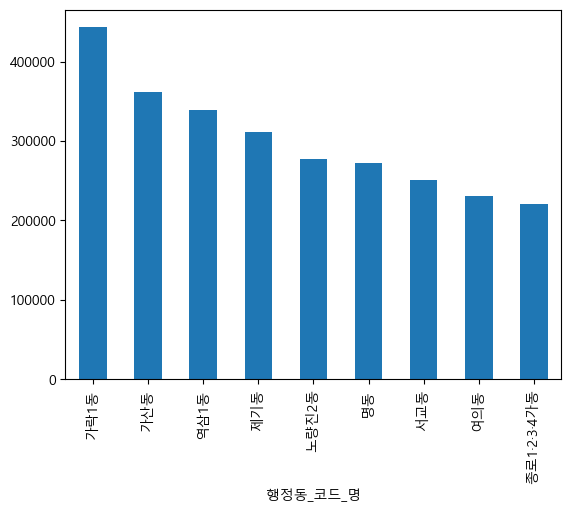

In [28]:
msc_10.plot.bar()

<Axes: xlabel='행정동_코드_명'>

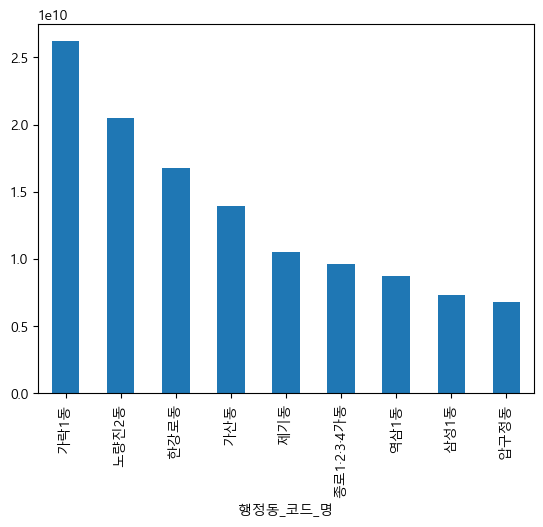

In [29]:
# monthly sales amount top10
msa_10= est_city['당월_매출_금액'].sort_values(ascending=False)[:9]
msa_10.plot.bar()

In [30]:
# 2030 매출건수 합쳐주자
est_city['2030_매출_건수'] = est_city['연령대_20_매출_건수'] + est_city['연령대_30_매출_건수']

<Axes: xlabel='행정동_코드_명'>

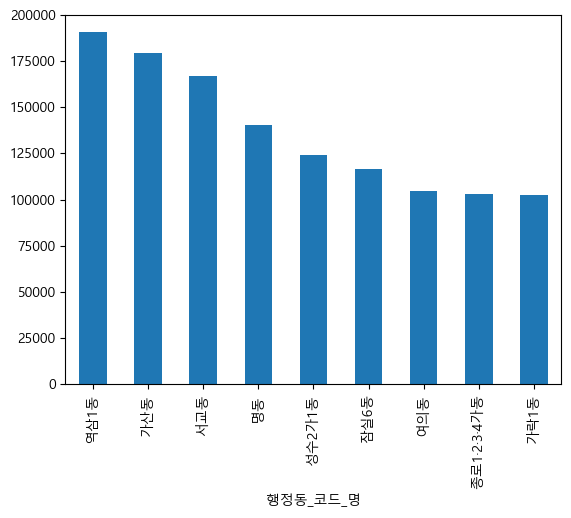

In [31]:
# 2030 매출건수 top10
# monthly sales count 2030 top10
msa_2030_10= est_city['2030_매출_건수'].sort_values(ascending=False)[:9]
msa_2030_10.plot.bar()

------------------------------------------------

In [32]:
est.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67748 entries, 0 to 67747
Data columns (total 53 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   기준_년분기_코드        67748 non-null  int64 
 1   행정동_코드           67748 non-null  int64 
 2   행정동_코드_명         67748 non-null  object
 3   서비스_업종_코드        67748 non-null  object
 4   서비스_업종_코드_명      67748 non-null  object
 5   당월_매출_금액         67748 non-null  int64 
 6   당월_매출_건수         67748 non-null  int64 
 7   주중_매출_금액         67748 non-null  int64 
 8   주말_매출_금액         67748 non-null  int64 
 9   월요일_매출_금액        67748 non-null  int64 
 10  화요일_매출_금액        67748 non-null  int64 
 11  수요일_매출_금액        67748 non-null  int64 
 12  목요일_매출_금액        67748 non-null  int64 
 13  금요일_매출_금액        67748 non-null  int64 
 14  토요일_매출_금액        67748 non-null  int64 
 15  일요일_매출_금액        67748 non-null  int64 
 16  시간대_00~06_매출_금액  67748 non-null  int64 
 17  시간대_06~11_매출_금액  67748 non-null

In [33]:
# 업종 별로 묶은 테이블

In [34]:
# 업종 코드명을 행
# 업종을 행으로한 테이블
# est_industry =est.set_index('서비스_업종_코드_명')
# 그냥 분기 신경안쓰고 합치려다보니 문자열이 있는 행정동,서비스 업종 코드명을 버려야한다.
est_industry= est.drop(columns=['행정동_코드_명','서비스_업종_코드'])

In [35]:
est_industry.sort_index()

,기준_년분기_코드,행정동_코드,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,...,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수
0,20221,11470620,치과의원,1255371056,8697,1073122439,182248617,183571522,177084909,264429743,...,1283,0,3962,4671,8,597,1089,2116,2230,2593
1,20221,11410555,일반의류,536751541,3445,400057216,136694325,102919117,93763009,97921133,...,903,0,458,2950,0,0,68,153,1202,1985
2,20221,11410585,미용실,2930026124,45797,1789589657,1140436467,310057864,327488918,342739127,...,16506,633,19421,26359,420,17471,10884,6655,7402,2947
3,20221,11410585,핸드폰,30747090,916,30747090,0,27857849,0,1560901,...,554,0,397,519,0,276,121,121,242,156
4,20221,11410615,중식음식점,1941612453,37494,1150902124,790710329,186534866,204923898,253775007,...,15079,747,20216,12738,49,5530,8002,6575,7164,5639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67743,20224,11620695,일반의원,9299370423,225884,7917160818,1382209605,1806324862,1490718695,1412381639,...,50916,144,92982,132711,1153,65327,55848,28949,33463,40953
67744,20224,11620695,의료기기,1870653857,2710,1870653857,0,12842033,22146749,1396426826,...,299,0,1096,1614,0,0,101,299,1194,1116
67745,20224,11620685,가전제품수리,131873111,308,118784581,13088530,0,115697664,3086917,...,0,0,123,185,0,0,61,0,247,0
67746,20224,11620685,호프-간이주점,525372348,12829,330833170,194539178,52542745,59787246,59828233,...,2467,5158,8897,3767,151,4788,3282,1975,1808,660


In [36]:
est_industry =est_industry.groupby('서비스_업종_코드_명').mean().astype('int64')
est_industry

,기준_년분기_코드,행정동_코드,당월_매출_금액,당월_매출_건수,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,...,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수
서비스_업종_코드_명,,,,,,,,,,,,,,,,,,,,,
PC방,20222,11462317,377350890,76888,241879372,135471518,47190431,45643605,47307610,47231835,...,25506,12188,62302,14577,9442,40721,16026,5095,4617,975
가구,20222,11455873,1092938029,3139,758847616,334090413,138889229,173192615,135190293,162071769,...,442,2,1487,1310,4,305,633,626,665,561
가방,20222,11366126,459979384,10078,297705129,162274255,56736324,54047966,68144524,54677549,...,3719,355,3373,6585,151,2424,2564,1794,1613,1409
가전제품,20222,11443171,2163559508,5904,1370963073,792596434,355841851,253494927,240694198,239972070,...,1721,24,3296,2372,10,396,1066,1228,1386,1580
가전제품수리,20222,11440967,121712150,1502,107565537,14146613,21568579,22506014,20878309,21415812,...,196,2,777,613,1,69,209,297,358,454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
한의원,20222,11445513,612571889,16445,488152895,124418994,107276438,101069098,88169680,84139891,...,3476,15,7246,9151,29,930,2120,2986,3786,6544
핸드폰,20222,11440995,287071593,6449,225389359,61682233,50024070,43578953,39201083,45458348,...,2190,85,3351,2866,105,1120,1089,1238,1516,1148
호프-간이주점,20222,11428390,1211833852,22920,813722656,398111195,131121613,150064017,159929666,167359803,...,6060,10125,13527,8244,351,7873,5935,3250,2904,1457


<Axes: xlabel='서비스_업종_코드_명'>

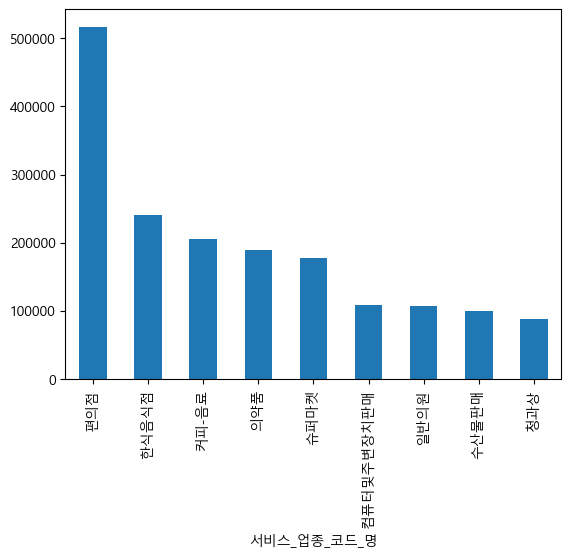

In [37]:
# monthly sales count industry top10
msc_industry_10= est_industry['당월_매출_건수'].sort_values(ascending=False)[:9]
msc_industry_10.plot.bar()

<Axes: xlabel='서비스_업종_코드_명'>

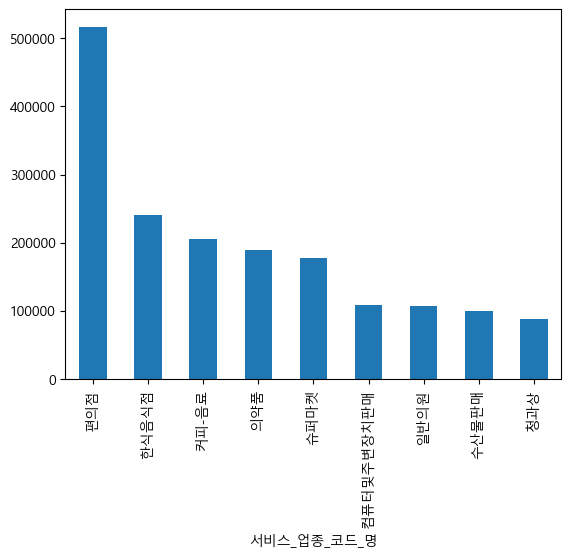

In [38]:
msc_industry_10.plot.bar()

<Axes: xlabel='서비스_업종_코드_명'>

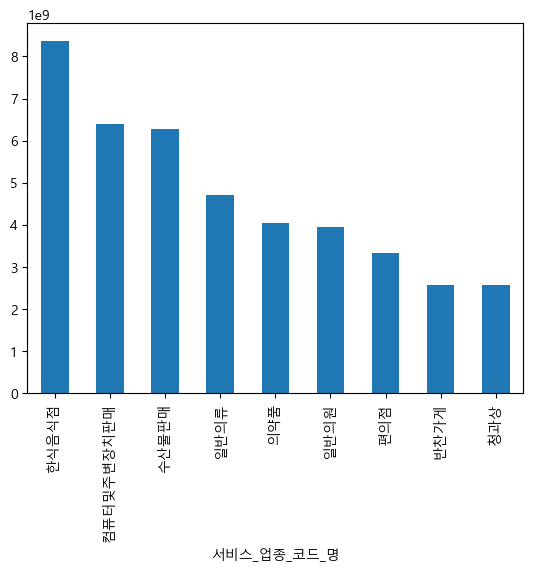

In [39]:
# monthly sales amount industry top10
msa_industry_10= est_industry['당월_매출_금액'].sort_values(ascending=False)[:9]
msa_industry_10.plot.bar()

In [40]:
# 2030 매출건수 합쳐주자
est_industry['2030_매출_건수'] = est_industry['연령대_20_매출_건수'] + est_industry['연령대_30_매출_건수']

<Axes: xlabel='서비스_업종_코드_명'>

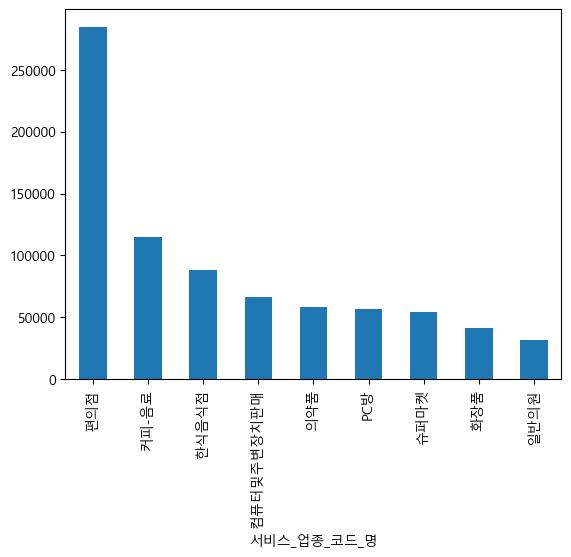

In [41]:
# 2030 매출건수 top10
# monthly sales count 2030 top10
msa_industry_2030_10= est_industry['2030_매출_건수'].sort_values(ascending=False)[:9]
msa_industry_2030_10.plot.bar()

In [42]:
# 2030 매출건수 합쳐주자
est_industry['2030_매출_금액'] = est_industry['연령대_20_매출_금액'] + est_industry['연령대_30_매출_금액']

<Axes: xlabel='월 매출 건수 업종 top10'>

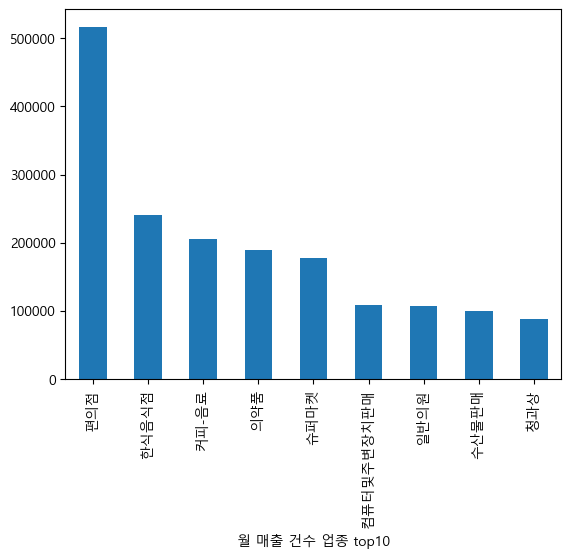

In [43]:
# 매출 건수 상위 업종 탑10
# monthly sales count top10
msa_industry_10= est_industry['당월_매출_건수'].sort_values(ascending=False)[:9]
msa_industry_10.plot.bar(xlabel='월 매출 건수 업종 top10')

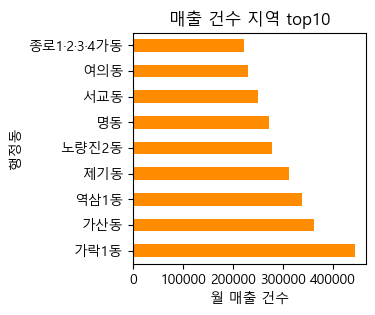

In [44]:
# 2030 매출 건수 상위 행정동 탑10
# 2030 매출건수 top10
# monthly sales count 2030 top10
msa_2030_10= est_city['당월_매출_건수'].sort_values(ascending=False)[:9]
msa_2030_10.plot.barh(title='매출 건수 지역 top10',xlabel='월 매출 건수',
                      figsize=(3,3),ylabel='행정동',color='darkorange')
plt.show()

<Axes: xlabel='서비스_업종_코드_명'>

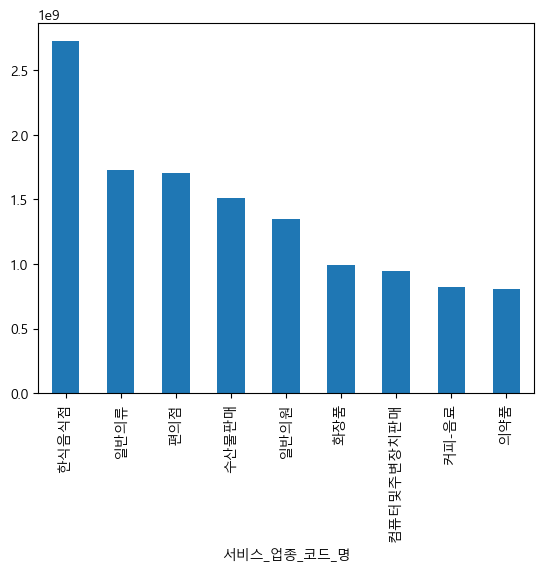

In [45]:
# 2030 매출건수 top10
# monthly sales count 2030 top10
msa_industry_2030_10= est_industry['2030_매출_금액'].sort_values(ascending=False)[:9]
msa_industry_2030_10.plot.bar()

-----------

---------------------

-------------------------------

In [46]:
pdt.rename(index={'종로1?2?3?4가동':'종로1.2.3.4가동'},inplace=True)

행정동_코드_명
북가좌2동          12659013
송천동            12765879
종로1.2.3.4가동    13484787
용신동            14221387
공덕동            14354051
화곡1동           16551125
북아현동           16934681
서교동            16980257
길동             17072090
역삼1동           21257950
Name: 총_유동인구_수, dtype: int32


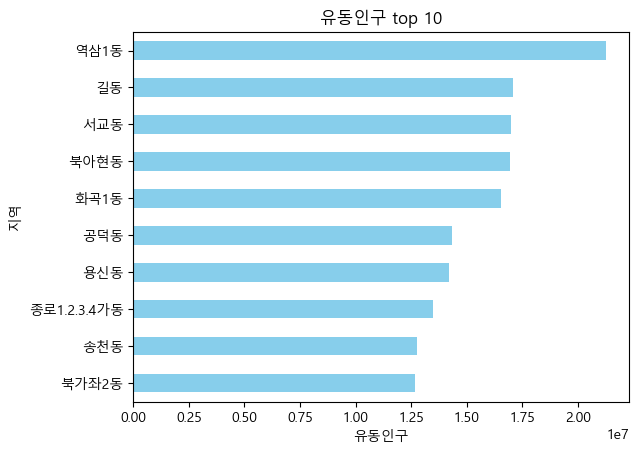

In [47]:
# 유동인구 탑10
# 유동인구 fp(floating population) top 5
fp_10 = pdt['총_유동인구_수'].sort_values(ascending = True)[-10:]
print(fp_10)
fp_10.plot.barh(title ='유동인구 top 10',xlabel='유동인구',ylabel='지역',color='skyblue')
plt.show()

In [48]:
pdt.info()


<class 'pandas.core.frame.DataFrame'>
Index: 424 entries, 가락1동 to 흑석동
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   기준_년분기_코드         424 non-null    int32
 1   행정동_코드            424 non-null    int32
 2   총_유동인구_수          424 non-null    int32
 3   남성_유동인구_수         424 non-null    int32
 4   여성_유동인구_수         424 non-null    int32
 5   연령대_10_유동인구_수     424 non-null    int32
 6   연령대_20_유동인구_수     424 non-null    int32
 7   연령대_30_유동인구_수     424 non-null    int32
 8   연령대_40_유동인구_수     424 non-null    int32
 9   연령대_50_유동인구_수     424 non-null    int32
 10  연령대_60_이상_유동인구_수  424 non-null    int32
 11  시간대_00_06_유동인구_수  424 non-null    int32
 12  시간대_06_11_유동인구_수  424 non-null    int32
 13  시간대_11_14_유동인구_수  424 non-null    int32
 14  시간대_14_17_유동인구_수  424 non-null    int32
 15  시간대_17_21_유동인구_수  424 non-null    int32
 16  시간대_21_24_유동인구_수  424 non-null    int32
 17  월요일_유동인구_수        424 non-null    int

In [49]:
def plottime(location):
    print(pdt.loc[location][['총_유동인구_수','시간대_00_06_유동인구_수',
     '시간대_06_11_유동인구_수',
    '시간대_11_14_유동인구_수',
    '시간대_14_17_유동인구_수',
    '시간대_17_21_유동인구_수',
    '시간대_21_24_유동인구_수']])
    pdt.loc[location][['시간대_00_06_유동인구_수',
     '시간대_06_11_유동인구_수',
    '시간대_11_14_유동인구_수',
    '시간대_14_17_유동인구_수',
    '시간대_17_21_유동인구_수',
    '시간대_21_24_유동인구_수']].plot.pie(
    figsize=(3,3),labels=['00 ~ 06시','06 ~ 11시','11 ~ 14시','14 ~ 17시','17 ~ 21시','21 ~ 24시'], 
    autopct='%.1f',fontsize=8,ylabel='',
    colors=['Pink','Lime','Lavender','Aqua','skyblue','Yellow']    
    )

총_유동인구_수            13484787
시간대_00_06_유동인구_수     1377694
시간대_06_11_유동인구_수     2614278
시간대_11_14_유동인구_수     2785504
시간대_14_17_유동인구_수     2874016
시간대_17_21_유동인구_수     2791471
시간대_21_24_유동인구_수     1041821
Name: 종로1.2.3.4가동, dtype: int32


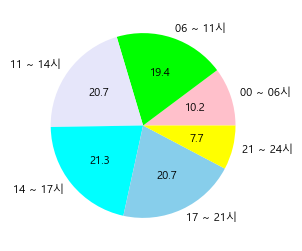

In [50]:
# 시간별 유동 인구수 
#역삼1동 길동 서교동 북아현동 화곡1동 공덕동 용신동 종로1.2.3.4가동 송천동 북가좌2동
location='종로1.2.3.4가동'
plottime(location)

In [51]:
def plotday(location):
    print(pdt.loc[location][['총_유동인구_수','월요일_유동인구_수','화요일_유동인구_수','수요일_유동인구_수','목요일_유동인구_수','금요일_유동인구_수','토요일_유동인구_수',
    '일요일_유동인구_수']])
    pdt.loc[location][['월요일_유동인구_수','화요일_유동인구_수','수요일_유동인구_수','목요일_유동인구_수','금요일_유동인구_수','토요일_유동인구_수',
    '일요일_유동인구_수']].plot.pie(
    figsize=(3,3),labels=['월','화','수','목','금','토','일'], 
    autopct='%.1f',fontsize=8,ylabel='',
    colors=['Pink','Lime','Lavender','Aqua','Orange','skyblue','Yellow']
        
    )

총_유동인구_수      14354051
월요일_유동인구_수     2084524
화요일_유동인구_수     2098179
수요일_유동인구_수     2093170
목요일_유동인구_수     2085782
금요일_유동인구_수     2063508
토요일_유동인구_수     1952194
일요일_유동인구_수     1976691
Name: 공덕동, dtype: int32


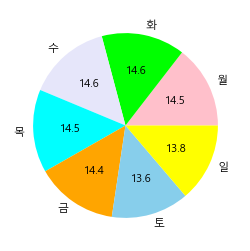

In [52]:
# 요일별 유동 인구수
#역삼1동 길동 서교동 북아현동 화곡1동 공덕동 용신동 종로1.2.3.4가동 송천동 북가좌2동
location='공덕동'
plotday(location)

In [53]:
pdt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 424 entries, 가락1동 to 흑석동
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   기준_년분기_코드         424 non-null    int32
 1   행정동_코드            424 non-null    int32
 2   총_유동인구_수          424 non-null    int32
 3   남성_유동인구_수         424 non-null    int32
 4   여성_유동인구_수         424 non-null    int32
 5   연령대_10_유동인구_수     424 non-null    int32
 6   연령대_20_유동인구_수     424 non-null    int32
 7   연령대_30_유동인구_수     424 non-null    int32
 8   연령대_40_유동인구_수     424 non-null    int32
 9   연령대_50_유동인구_수     424 non-null    int32
 10  연령대_60_이상_유동인구_수  424 non-null    int32
 11  시간대_00_06_유동인구_수  424 non-null    int32
 12  시간대_06_11_유동인구_수  424 non-null    int32
 13  시간대_11_14_유동인구_수  424 non-null    int32
 14  시간대_14_17_유동인구_수  424 non-null    int32
 15  시간대_17_21_유동인구_수  424 non-null    int32
 16  시간대_21_24_유동인구_수  424 non-null    int32
 17  월요일_유동인구_수        424 non-null    int

In [54]:
day=pdt.rename(columns={'월요일_유동인구_수':'월요일','화요일_유동인구_수':'화요일',
                    '수요일_유동인구_수':'수요일','목요일_유동인구_수':'목요일',
                    '금요일_유동인구_수':'금요일','토요일_유동인구_수':'토요일',
    '일요일_유동인구_수':'일요일'})
day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 424 entries, 가락1동 to 흑석동
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   기준_년분기_코드         424 non-null    int32
 1   행정동_코드            424 non-null    int32
 2   총_유동인구_수          424 non-null    int32
 3   남성_유동인구_수         424 non-null    int32
 4   여성_유동인구_수         424 non-null    int32
 5   연령대_10_유동인구_수     424 non-null    int32
 6   연령대_20_유동인구_수     424 non-null    int32
 7   연령대_30_유동인구_수     424 non-null    int32
 8   연령대_40_유동인구_수     424 non-null    int32
 9   연령대_50_유동인구_수     424 non-null    int32
 10  연령대_60_이상_유동인구_수  424 non-null    int32
 11  시간대_00_06_유동인구_수  424 non-null    int32
 12  시간대_06_11_유동인구_수  424 non-null    int32
 13  시간대_11_14_유동인구_수  424 non-null    int32
 14  시간대_14_17_유동인구_수  424 non-null    int32
 15  시간대_17_21_유동인구_수  424 non-null    int32
 16  시간대_21_24_유동인구_수  424 non-null    int32
 17  월요일               424 non-null    int

In [55]:
## 요일 막대그래프
def plotdaybar(location):
    print(day.loc[location][['총_유동인구_수','월요일','화요일','수요일','목요일','금요일','토요일',
    '일요일']])
    day.loc[location][['월요일','화요일','수요일','목요일','금요일','토요일',
    '일요일']].plot.bar(
    figsize=(3,3), 
    fontsize=8,
    #color=['Blue Green','Light Coral','Lavender','Medium Slate Blue','Olive','Apricot','Tan'],
    color='Lime',
        title='',xlabel='요일',ylabel=''
    ,grid=False,alpha=0.4
        
    )

총_유동인구_수    16934681
월요일          2561818
화요일          2648470
수요일          2653849
목요일          2661170
금요일          2597861
토요일          1928718
일요일          1882792
Name: 북아현동, dtype: int32


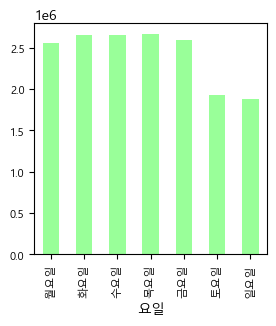

In [56]:
#역삼1동 길동 서교동 북아현동 화곡1동 공덕동 용신동 종로1.2.3.4가동 송천동 북가좌2동
plotdaybar('북아현동')


In [57]:
time=pdt.rename(columns={'시간대_00_06_유동인구_수':'00~06',
     '시간대_06_11_유동인구_수':'06~11',
    '시간대_11_14_유동인구_수':'11~14',
    '시간대_14_17_유동인구_수':'14~17',
    '시간대_17_21_유동인구_수':'17~21',
    '시간대_21_24_유동인구_수':'21~00'})

In [58]:
# time.info()
# # time.rename(index={'종로1?2?3?4가동':'종로1234가동'},inplace=True)

In [59]:
# time['행정동_코드'].startwith('종로')

In [60]:
def plottimebar(location):
  
    time.loc[location][['00~06',
     '06~11',
    '11~14',
    '14~17',
    '17~21',
    '21~00']].plot.bar(
    figsize=(3,3)  ,fontsize=8,ylabel='',xlabel='시간',
        color='Lime',alpha=0.4
        #grid=True,
    )
    #colors=['Pink','Lime','Lavender','Aqua','skyblue','Yellow']    

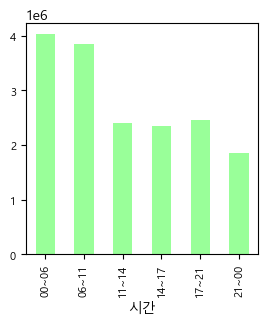

In [61]:
# 시간별 유동 인구수 
#역삼1동 길동 서교동 북아현동 화곡1동 공덕동 용신동 종로1·2·3·4가동 송천동 북가좌2동
location='북아현동'
plottimebar(location)

In [62]:
dong = pd.read_csv('data/서울시_상권분석서비스(추정매출-행정동)_2022년.csv', encoding='cp949')
dong = dong[dong['기준_년분기_코드'].astype(str).str.startswith('2022')]

In [63]:
dong.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67748 entries, 0 to 67747
Data columns (total 53 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   기준_년분기_코드        67748 non-null  int64 
 1   행정동_코드           67748 non-null  int64 
 2   행정동_코드_명         67748 non-null  object
 3   서비스_업종_코드        67748 non-null  object
 4   서비스_업종_코드_명      67748 non-null  object
 5   당월_매출_금액         67748 non-null  int64 
 6   당월_매출_건수         67748 non-null  int64 
 7   주중_매출_금액         67748 non-null  int64 
 8   주말_매출_금액         67748 non-null  int64 
 9   월요일_매출_금액        67748 non-null  int64 
 10  화요일_매출_금액        67748 non-null  int64 
 11  수요일_매출_금액        67748 non-null  int64 
 12  목요일_매출_금액        67748 non-null  int64 
 13  금요일_매출_금액        67748 non-null  int64 
 14  토요일_매출_금액        67748 non-null  int64 
 15  일요일_매출_금액        67748 non-null  int64 
 16  시간대_00~06_매출_금액  67748 non-null  int64 
 17  시간대_06~11_매출_금액  67748 non-null

In [64]:
# 요식업 열빼고 다 제외
dong = dong[dong['서비스_업종_코드_명'].isin(['한식음식점', '중식음식점', '일식음식점', '양식음식점', '패스트푸드점', '치킨전문점','분식전문점', '호프-간이주점'])]
# dong

In [65]:
# 요식업만 있던 dong에 행정동을 행으로 한다 
dong.set_index('행정동_코드_명',inplace=True)


In [66]:
# dong

In [67]:
dong.drop(columns=['서비스_업종_코드_명','서비스_업종_코드'],inplace=True)
dong = dong.loc[:].groupby('행정동_코드_명').mean().astype(int)

행정동_코드_명
도곡2동      2119413461
망우본동      2095575963
구의1동      2078876535
상계6·7동    2070571544
상계1동      2061914991
공덕동       2053664058
이화동       2013195859
면목본동      2011757443
안암동       2011540475
장안2동      2005087976
Name: 당월_매출_금액, dtype: int32


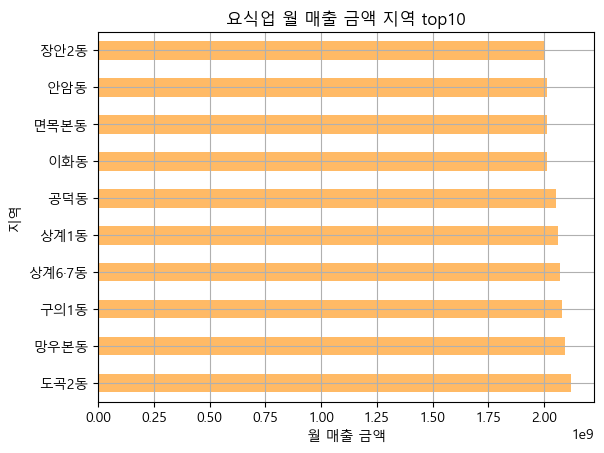

In [68]:
# 2030 매출 금액 상위 행정동 탑10
# 2030 매출건수 top10
# 요식업 monthly sales count top10
msa_10= dong['당월_매출_금액'].sort_values(ascending=False)[:10]
print(msa_10)
msa_10.plot.barh(title='요식업 월 매출 금액 지역 top10',xlabel='월 매출 금액',ylabel='지역',color='darkorange',grid=True,alpha=0.6)
plt.show()

행정동_코드_명
역삼1동           633630
서교동            518483
종로1·2·3·4가동    478708
여의동            427342
명동             345155
가산동            339915
삼성1동           298342
구로3동           252581
신촌동            244871
서초3동           230782
Name: 당월_매출_건수, dtype: int32


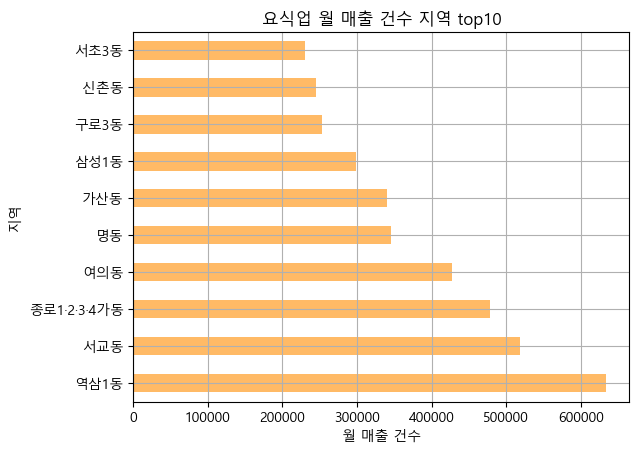

In [69]:
# 2030 매출 건수 상위 행정동 탑10
# 2030 매출건수 top10
# 요식업 monthly sales count top10
msa_10= dong['당월_매출_건수'].sort_values(ascending=False)[:10]
print(msa_10)
msa_10.plot.barh(title='요식업 월 매출 건수 지역 top10',xlabel='월 매출 건수',ylabel='지역',color='darkorange',grid=True,alpha=0.6)
plt.show()

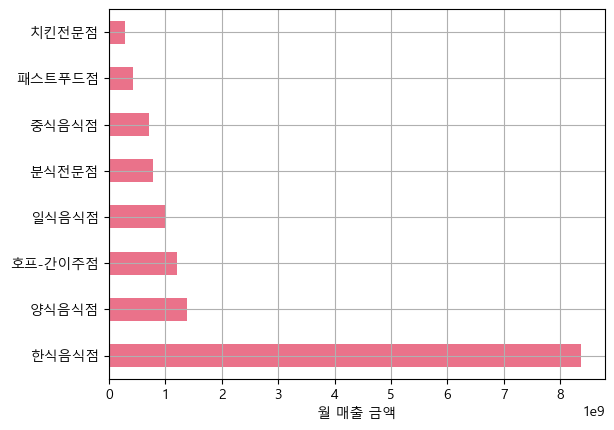

In [70]:
# 음식 상위 업종 매출 금액 비교
# monthly sales value top10
msv_industry_10= est_industry.loc[['한식음식점', '중식음식점', '일식음식점', '양식음식점', '패스트푸드점', '치킨전문점','분식전문점', '호프-간이주점']]['당월_매출_금액'].sort_values(ascending=False)[:]
msv_industry_10.plot.barh(title='',xlabel='월 매출 금액',ylabel='',color='crimson',grid=True,alpha=0.6)
plt.show()

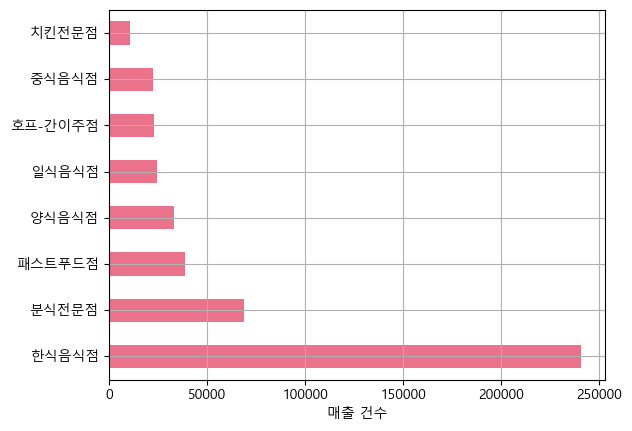

In [71]:
# 음식 상위 업종 매출 금액 비교
# monthly sales value top10
msv_industry_10= est_industry.loc[['한식음식점', '중식음식점', '일식음식점', '양식음식점', '패스트푸드점', '치킨전문점','분식전문점', '호프-간이주점']]['당월_매출_건수'].sort_values(ascending=False)[:]
msv_industry_10.plot.barh(title='',xlabel='매출 건수',ylabel='',color='crimson',grid=True,alpha=0.6)
plt.show()

In [72]:
food_industry=est_industry.rename(columns={'월요일_매출_금액':'월',
     '화요일_매출_금액':'화','수요일_매출_금액':'수','목요일_매출_금액':'목','금요일_매출_금액':'금',
                                          '토요일_매출_금액':'토','일요일_매출_금액':'일',
                                          '시간대_00~06_매출_금액':'00~06', '시간대_06~11_매출_금액':'06~11',
     '시간대_11~14_매출_금액':'11~14',
     '시간대_14~17_매출_금액':'14~17','시간대_17~21_매출_금액':'17~21', '시간대_21~24_매출_금액':'21~24'
                                         
                                         })

In [73]:
def foodday(location):
    food_industry.loc[location][['월',
     '화','수','목','금','토','일']].plot.barh(
    title=location,xlabel='',ylabel='매출금액',color='saddlebrown',grid=False,alpha=0.6
    ,figsize=(3,3))
    

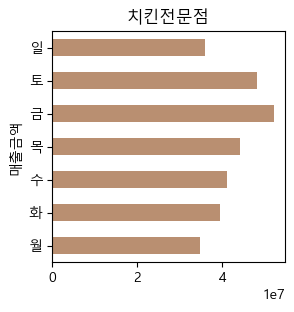

In [74]:
location='치킨전문점'
foodday(location)

In [75]:
def foodtime(location):
    food_industry.loc[location][['00~06', '06~11',
     '11~14',
     '14~17','17~21', '21~24']].plot.barh(
        title=location,xlabel='',ylabel='시간대',color='saddlebrown',grid=False,alpha=0.6,figsize=(3,3)
     )

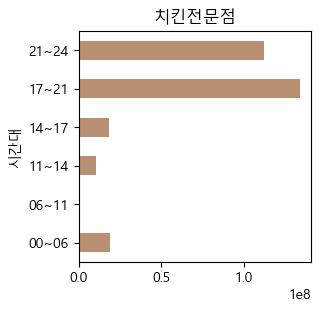

In [76]:
location='치킨전문점'
foodtime(location)

In [77]:
est_industry.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63 entries, PC방 to 화초
Data columns (total 52 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   기준_년분기_코드        63 non-null     int64
 1   행정동_코드           63 non-null     int64
 2   당월_매출_금액         63 non-null     int64
 3   당월_매출_건수         63 non-null     int64
 4   주중_매출_금액         63 non-null     int64
 5   주말_매출_금액         63 non-null     int64
 6   월요일_매출_금액        63 non-null     int64
 7   화요일_매출_금액        63 non-null     int64
 8   수요일_매출_금액        63 non-null     int64
 9   목요일_매출_금액        63 non-null     int64
 10  금요일_매출_금액        63 non-null     int64
 11  토요일_매출_금액        63 non-null     int64
 12  일요일_매출_금액        63 non-null     int64
 13  시간대_00~06_매출_금액  63 non-null     int64
 14  시간대_06~11_매출_금액  63 non-null     int64
 15  시간대_11~14_매출_금액  63 non-null     int64
 16  시간대_14~17_매출_금액  63 non-null     int64
 17  시간대_17~21_매출_금액  63 non-null     int64
 18  시간대_21~24_매출_금액

In [78]:
# # 업종 코드명을 행
# # 업종을 행으로한 테이블
time =est.set_index('서비스_업종_코드_명')
# # 그냥 분기 신경안쓰고 합치려다보니 문자열이 있는 행정동,서비스 업종 코드명을 버려야한다.
time.drop(columns=['행정동_코드_명','서비스_업종_코드'],inplace=True)

In [79]:
 time =time.loc[:].groupby('서비스_업종_코드_명').mean().astype(int)

In [80]:
 time.index

Index(['PC방', '가구', '가방', '가전제품', '가전제품수리', '고시원', '골프연습장', '네일숍', '노래방',
       '당구장', '문구', '미곡판매', '미용실', '반찬가게', '부동산중개업', '분식전문점', '서적', '섬유제품',
       '세탁소', '수산물판매', '슈퍼마켓', '스포츠 강습', '스포츠클럽', '시계및귀금속', '신발', '안경', '애완동물',
       '양식음식점', '여관', '예술학원', '완구', '외국어학원', '운동/경기용품', '육류판매', '의료기기', '의약품',
       '인테리어', '일반교습학원', '일반의류', '일반의원', '일식음식점', '자동차미용', '자동차수리',
       '자전거 및 기타운송장비', '전자상거래업', '제과점', '조명용품', '중식음식점', '철물점', '청과상', '치과의원',
       '치킨전문점', '커피-음료', '컴퓨터및주변장치판매', '패스트푸드점', '편의점', '피부관리실', '한식음식점',
       '한의원', '핸드폰', '호프-간이주점', '화장품', '화초'],
      dtype='object', name='서비스_업종_코드_명')

In [81]:
 time.loc['음식점'] = time.loc['분식전문점'] + time.loc['일식음식점']+ time.loc['중식음식점'] + time.loc['치킨전문점']+time.loc['패스트푸드점']+time.loc['한식음식점']+time.loc['호프-간이주점']+time.loc['양식음식점']
# time.index

In [82]:
 time= time.rename(columns={'월요일_매출_건수':'월요일','화요일_매출_건수':'화요일',
                    '수요일_매출_건수':'수요일',
                      '목요일_매출_건수':'목요일',
                      '금요일_매출_건수':'금요일',
                     '토요일_매출_건수':'토요일',
                    '일요일_매출_건수':'일요일'})
# time.columns

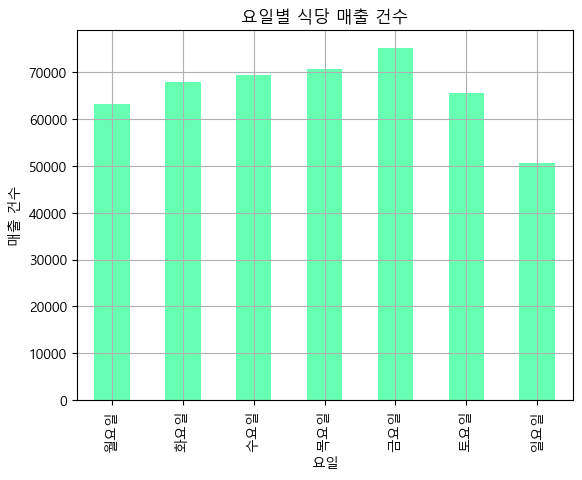

In [83]:
# 요일별 매출 건수 비교
time.loc['음식점']['월요일':'일요일'].plot.bar(title='요일별 식당 매출 건수',xlabel='요일',ylabel='매출 건수',color='springgreen',grid='--',alpha=0.6)
plt.show()

In [84]:
 time= time.rename(columns={'시간대_건수~06_매출_건수':'00~06시','시간대_건수~11_매출_건수':'06~11시',
                      '시간대_건수~14_매출_건수':'11~14시',
                     '시간대_건수~17_매출_건수':'14~17시',
                    '시간대_건수~21_매출_건수':'17~21시',
                   '시간대_건수~24_매출_건수':'21~24시'})

In [85]:
# time.columns

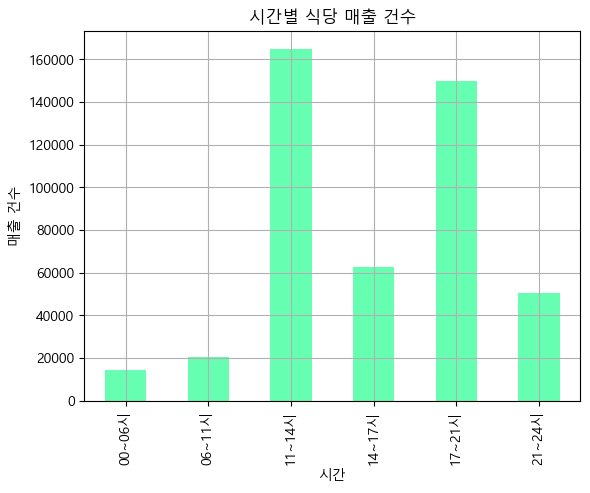

In [86]:
# 사용시간 별 매출 건수 비교
time.loc['음식점']['00~06시':'21~24시'].plot.bar(title='시간별 식당 매출 건수',xlabel='시간',ylabel='매출 건수',color='springgreen',grid=True,alpha=0.6)
plt.show()

In [87]:
sale_city=est_city.rename(columns={
 '월요일_매출_건수':'월요일',
    '화요일_매출_건수':'화요일',
    '수요일_매출_건수':'수요일',
  '목요일_매출_건수':'목요일',
    '금요일_매출_건수':'금요일', 
    '토요일_매출_건수':'토요일',
    '일요일_매출_건수':'일요일',
'시간대_건수~06_매출_건수':'00~06',
    '시간대_건수~11_매출_건수':'06~11',
    '시간대_건수~14_매출_건수':'11~14',
'시간대_건수~17_매출_건수':'14~17',
    '시간대_건수~21_매출_건수':'17~21',
    '시간대_건수~24_매출_건수':'21~24'
    
})

In [88]:
# sale_city.info()
est_city.rename(index={'종로1?2?3?4가동':'종로1234가동'},inplace=True)


In [89]:
est_city.loc['장지동':'중계동', '당월_매출_금액']

행정동_코드_명
장지동              816524761
장충동             1113344946
전농1동             726932041
전농2동             380048129
정릉1동             336719469
정릉2동             345671467
정릉3동             338510036
정릉4동             592150794
제기동            10486447697
조원동             1224408026
종로1·2·3·4가동     9582745105
종로5·6가동         2304277511
종암동              777264813
중계1동             428369625
중계2·3동          3008795474
중계4동             841170503
Name: 당월_매출_금액, dtype: int64

In [90]:
def sale_city_day(location):
    sale_city.loc[location][['월요일',
                       '화요일',
                       '수요일',
                       '목요일',
                       '금요일',
                       '토요일',
                       '일요일']].plot.bar(
    figsize=(3,3), 
    fontsize=8,
    #color=['Blue Green','Light Coral','Lavender','Medium Slate Blue','Olive','Apricot','Tan'],
    color='crimson',
        title='',xlabel='요일',ylabel='매출건수'
    ,grid=True,alpha=0.7 
)

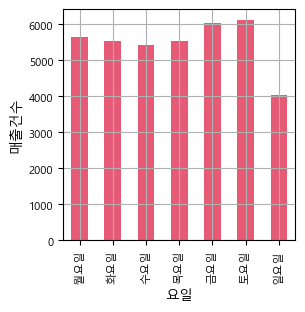

In [91]:
location='북가좌2동'
sale_city_day(location)

In [92]:
#역삼1동 길동 서교동 북아현동 화곡1동 공덕동 용신동 종로1.2.3.4가동 송천동 북가좌2동

In [93]:
def sale_city_time(location):
    sale_city.loc[location][['00~06','06~11','11~14','14~17','17~21','21~24' ]].plot.bar(figsize=(3,3)  ,fontsize=8,ylabel='매출건수',xlabel='시간',
    color='Aqua',grid=True,alpha=0.3)

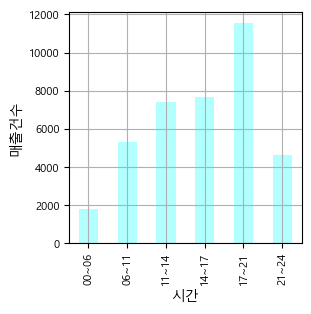

In [94]:
location='북가좌2동'
sale_city_time(location)